<a href="https://colab.research.google.com/github/GouravRohit/Stock-Prediction-Analysis-ML/blob/main/ML_Project_(Yes_Bank)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ****Project** - Yes Bank Stock Closing Price Prediction**



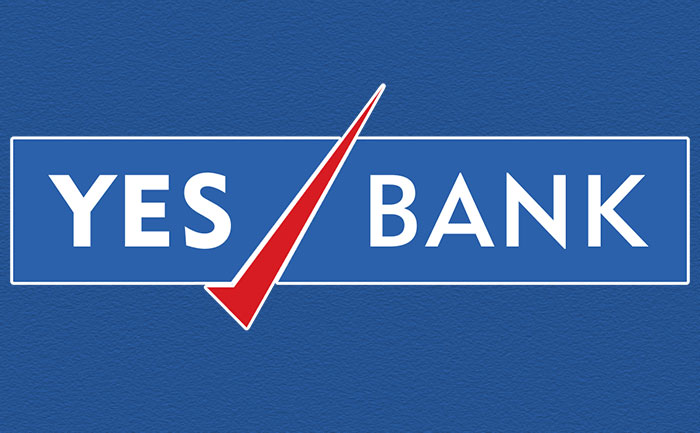

### **Project Type**    - Regression
### **Project** - Yes Bank Stock Closing Price Prediction
### **Name** - **Gourav Rohit**


# **Project Summary**

Yes Bank is a banking company that was founded in 2004 that offers a wide range of differentiated products for its corporate and retail customers through retail banking and asset management services. It is also a publically traded company. That provides an opportunity for anyone to invest in Yes bank and become a shareholder. But at the same time, it means that the valuation of the company is now in the hands of investors and speculators as share prices are often heavily impacted by public opinion. We have used yes bank stock price data set. This dataset contains 5 different features that can be used for predicting close price prediction using machine learning. We have built machine learning regression model for price prediction. We have used some of best models.

# **GitHub Link -**

# **Problem Statement**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.


**Project Type - Linear Regression**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [9]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot
!pip install cartopy
import cartopy

E: Package 'libfluidsynth1' has no installation candidate


In [10]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
)
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [11]:
# first we need to mount the google drive


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/Module project/yes bank/data_YesBank_StockPrices.csv')
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset First View

In [14]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [15]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [16]:
# Dataset Info
print('The length of the data is ',len(df))


The length of the data is  185


In [17]:
#describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [18]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [19]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [20]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


### What did you know about your dataset?

**Dataset Overview**

The dataset represents the historical stock data of Yes Bank. It contains 185 records with the following columns:

**Date:** The date of the record (in "Month-Year" format).

**Open:** The opening price of Yes Bank stock on that particular date.

**High:** The highest price reached by Yes Bank stock on that date.

**Low:** The lowest price reached by Yes Bank stock on that date.

**Close:** The closing price of Yes Bank stock on that particular date.

There are 185 datapoints in total, with the entire ranging from jul-05 to nov-20.The date column containing inapropriate datatype object which we need to convert in future for get trends and seasonal data accordingly , the columns Open, High,Low ,and Close are of float64 type, representing the numerical prices. In the data does not contains any null values

## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [24]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

**1. Date [Type: object (string)]**

Represents the date on which the stock data was recorded.
Format: "Month-Year" (e.g., "Jul-05", "Aug-05", etc.).
This column is used to identify the time period for the respective stock data.

**2. Open [Type: float64]**

Represents the opening price of Yes Bank stock on the given date.
This is the price of the stock when the market opens on that particular day.
It is one of the key indicators of how the stock is performing on a specific day.

**3. High [Type: float64]**

Represents the highest price reached by Yes Bank stock during the trading day.
This value indicates the peak price the stock reached within that trading day, showing the highest market valuation.

**4. Low [Type: float64]**

Represents the lowest price reached by Yes Bank stock during the trading day.
This is the bottom price that the stock reached during that day's trading session. It shows the lowest valuation that the stock had during the trading day.

**5. Close [Type: float64]**

Represents the closing price of Yes Bank stock on the given date.
This is the price of the stock when the market closes for the day.
The closing price is one of the most important metrics for tracking the performance of a stock because it reflects the final market consensus of the stock's value for that day.


## 3. ***Data Wrangling***

### Data Wrangling Code

####Converting Date Column

In [25]:
# convert the 'Date' column to a date time format
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x : datetime.strptime(x,'%b-%y')))


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


####Exploratory Data Analysis(EDA)

#####Univariate Analysis

In [27]:
#list the all columns we do have
col = list(df.columns)
col

['Date', 'Open', 'High', 'Low', 'Close']

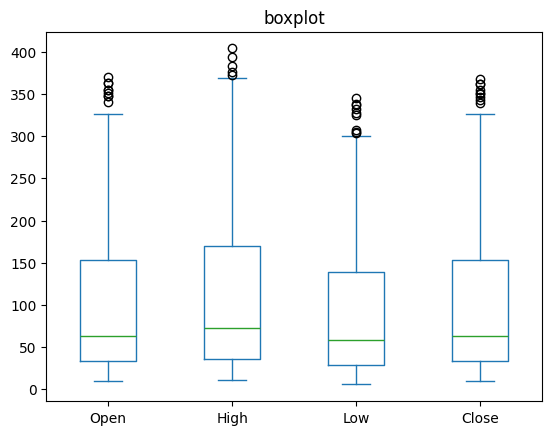

In [28]:
#Plot the distribution of each column.
# we will use box plot to show the distribution of all the numeric columns
ax = df[col].plot(kind='box', title='boxplot')

plt.show()

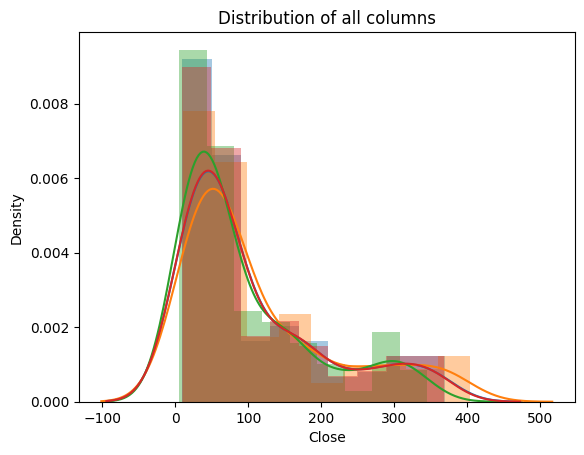

In [29]:
# lets see the histogram plot for each column in one chart so we can interprate that how they are diffrent from each other
sns.distplot(df['Open'],kde=True)
sns.distplot(df['High'],kde=True)
sns.distplot(df['Low'],kde=True)
sns.distplot(df['Close'],kde=True)
plt.title("Distribution of all columns")
plt.show()

####Bivariate Analysis

**Analyze the relationship between the 'Close' price and other features.**

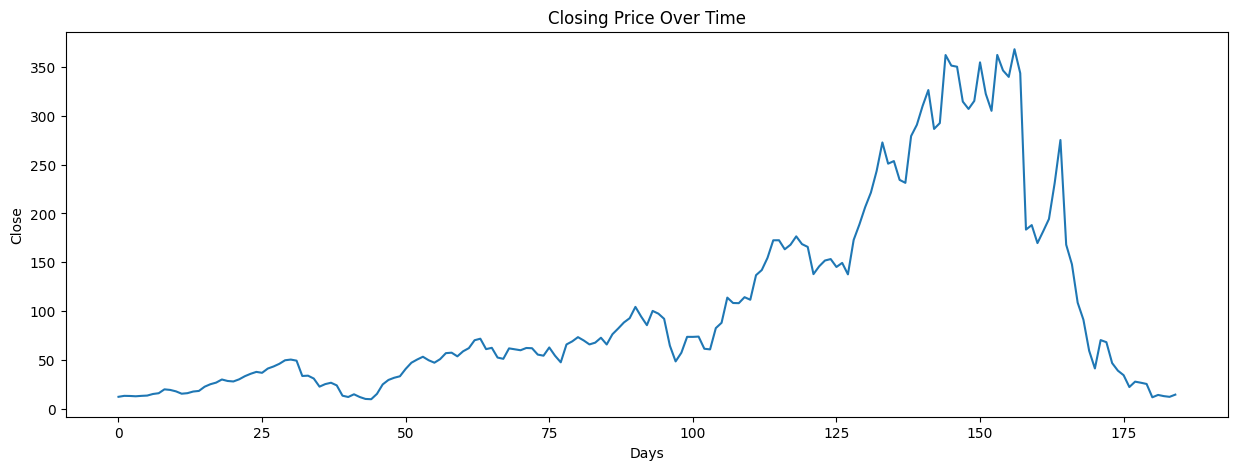

In [30]:
#
plt.figure(figsize=(15, 5))
sns.lineplot(x=df.index, y='Close', data=df)
plt.title('Closing Price Over Time')
plt.xlabel('Days')
plt.show()

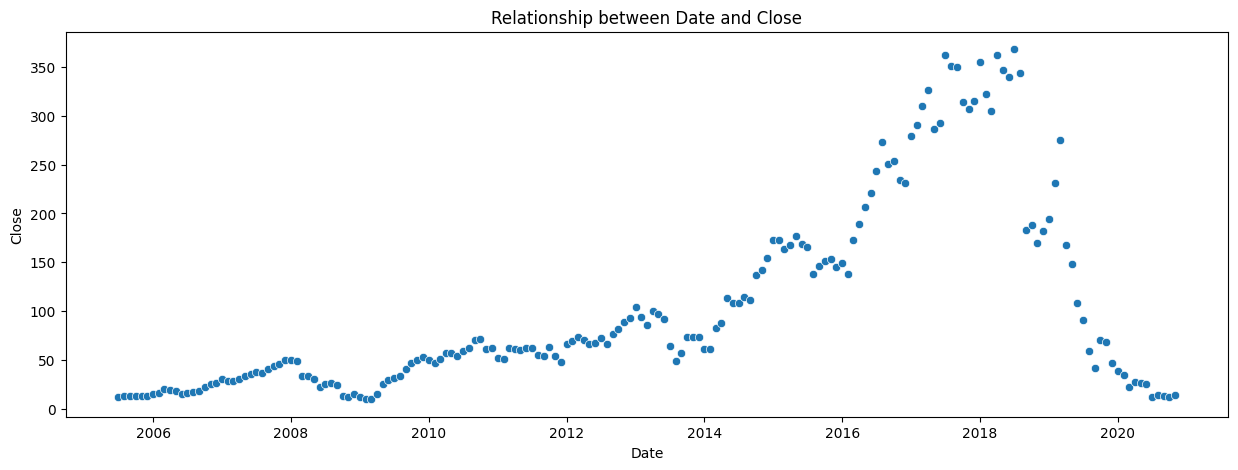

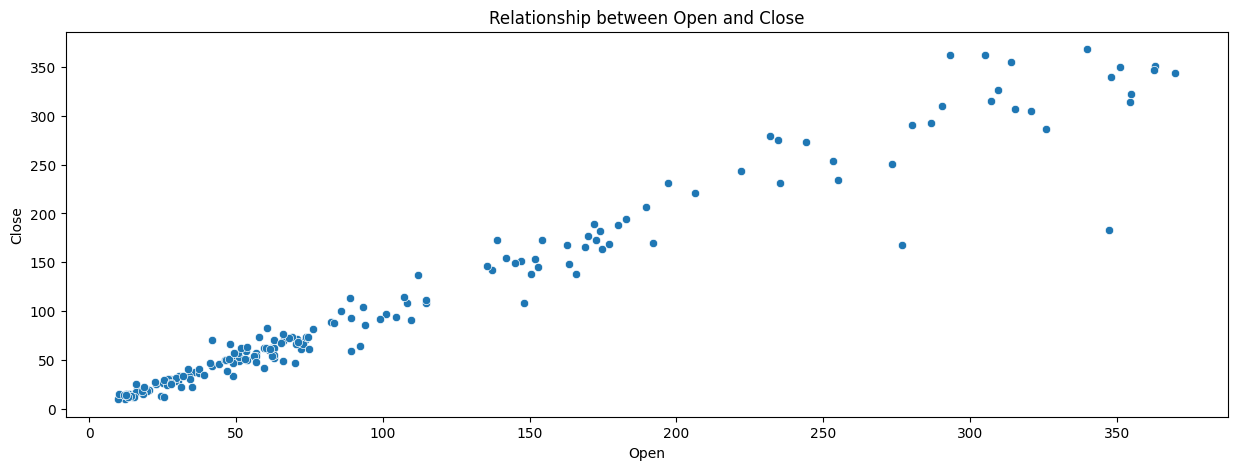

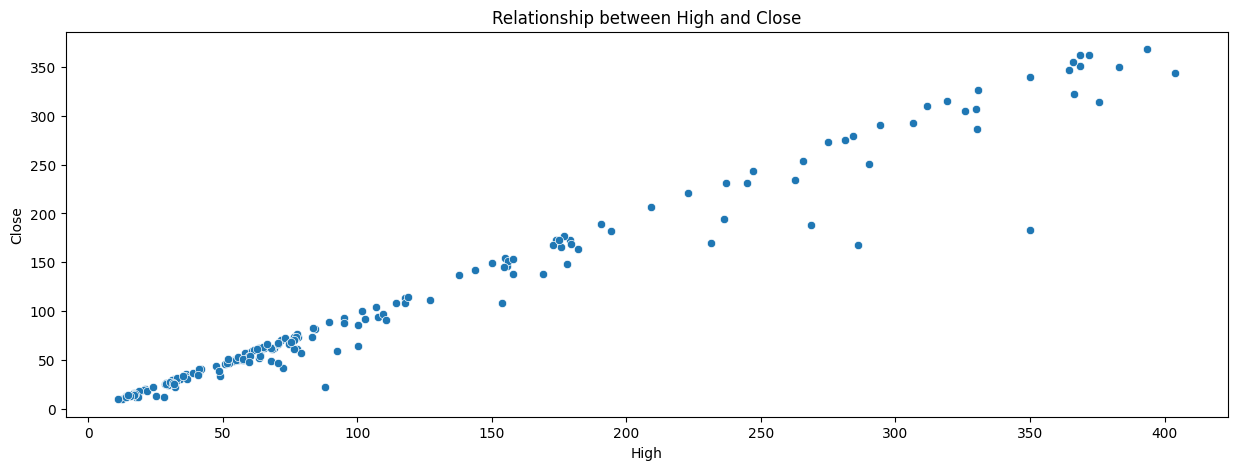

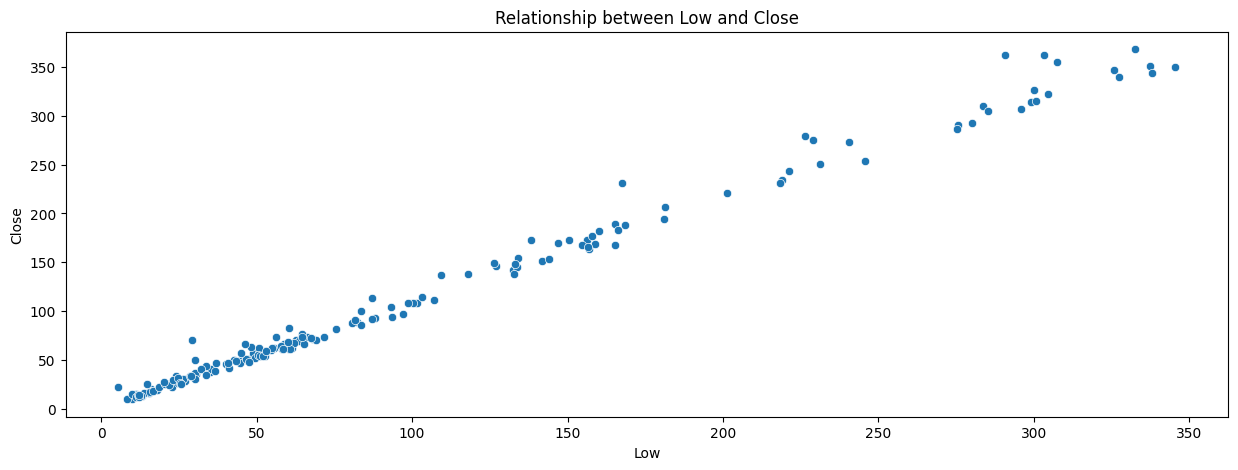

In [31]:
# lets see the reationship between all the variable with the 'Close' column
for col in df.columns:
    if col != 'Close':
        plt.figure(figsize=(15, 5))
        sns.scatterplot(x=col, y='Close', data=df)
        plt.title(f'Relationship between {col} and Close')
        plt.show()

In [32]:
# we are creating date column as an index
df.set_index('Date',inplace=True)

In [33]:
# the library which is used to vaualize the stock data by using different charts
!pip install mplfinance

import mplfinance as mpf

# Assigning a variable to store all the data of 'Open', 'High', 'Low', 'Close' from the row data
df_candle = df[['Open', 'High', 'Low', 'Close']]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.0 MB/s eta 0:00:00


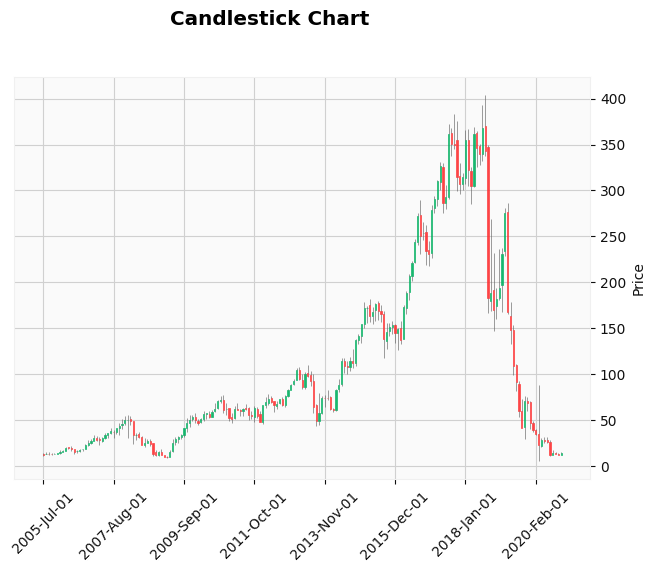

In [34]:
# creating a candle stick chart to show the stock trends and movements
mpf.plot(df_candle, type='candle', style='yahoo', title='Candlestick Chart')

####Multivariate Analysis

**Plot a heatmap to visualize correlations.**

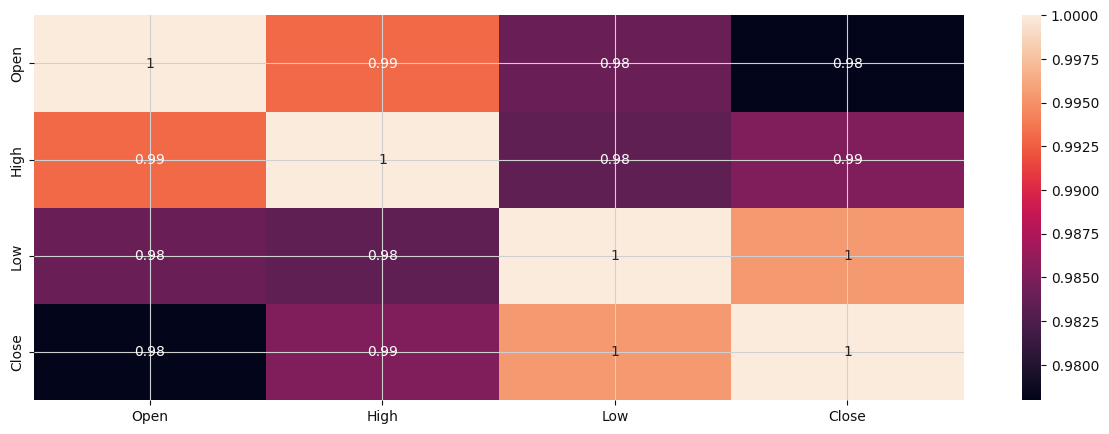

In [35]:
# creating the heatmap to show the correlation of variables
plt.figure(figsize=(15,5))
cor = sns.heatmap(df.corr(),annot=True)

Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

we will try to reducing multicollinearity using transformation of variables

In [36]:
# lets perform the power analysis using PowerTransformer
pw = PowerTransformer(method='box-cox',standardize=True)

In [37]:
# making a object where we can apply the power analysis transformation
cf= df[list(df.columns)]

In [38]:
# lets see the column 'Close'
df['Close']

,Close
Date,
2005-07-01,12.46
2005-08-01,13.42
2005-09-01,13.30
2005-10-01,12.99
2005-11-01,13.41
...,...
2020-07-01,11.95
2020-08-01,14.37
2020-09-01,13.15


In [39]:
# pwerforming the poweranalysis transformation on the object where we store the data, in the form of dataframe
# so we can get a tranformed dataframe
kf = pd.DataFrame(pw.fit_transform(cf))

In [40]:
# checking the transformed data
kf.head()

,0,1,2,3
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [41]:
# renaming the columns as they were before transformation
kf.rename(columns={0:'Open',1:'High',2:'Low',3:'Close'},inplace=True)

<Axes: >

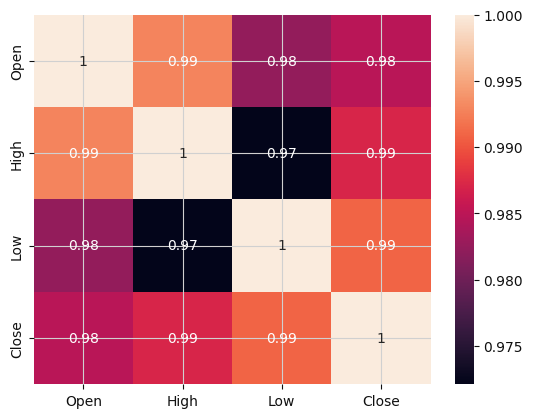

In [42]:
# checking the correlation between transformed columns by using heatmap
sns.heatmap(kf.corr(),annot=True)

In [43]:
# creating object of all the columns in a list of transformed data
col = list(kf.columns)

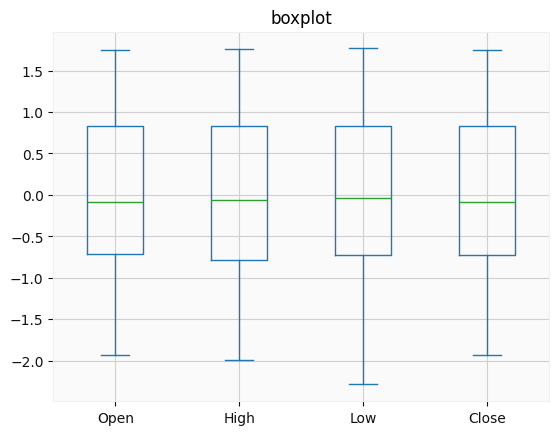

In [44]:
# now visualise the data by using box plot of transformed data
ax = kf[col].plot(kind='box', title='boxplot')

plt.show()

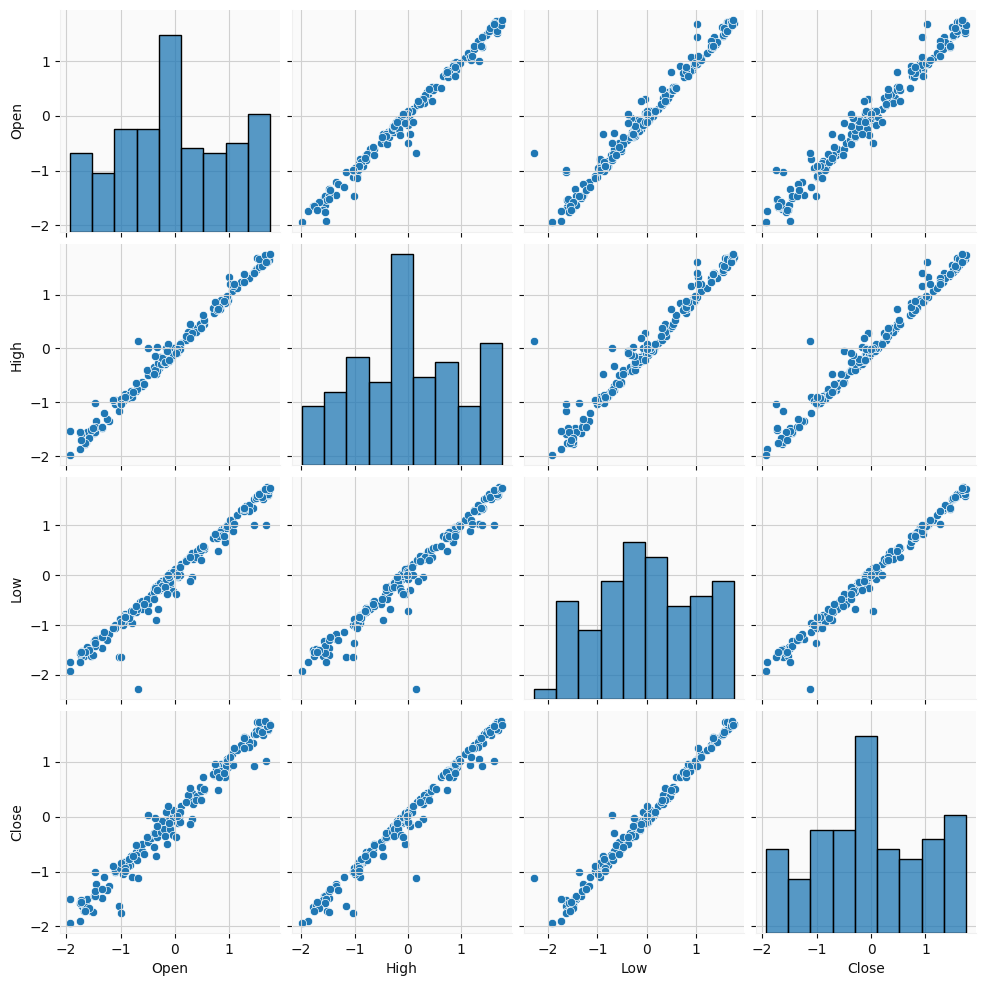

In [45]:
# lets see the relationship between diffrent variables of the transformed data , by using pair plot
sns.pairplot(kf)

####Data Preprocessing

**Power Transformation to Reduce Multicollinearity**

Transform the features using PowerTransformer.

In [46]:
# top 5 rows view of the transformed data
kf.head()

,Open,High,Low,Close
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [47]:
# assigning the dependent variable
dependent_variable = 'Close'

# assigning independent variables
independent_variable = list(set(kf.columns.tolist())-{dependent_variable})

In [48]:
# lets devide the dataset into two part , X and y
# where X is collection of independent variables , and y is dependent variable
x=df[independent_variable].values
y=df[dependent_variable].values

In [49]:
# now performing split by using train_test_split with the transformed data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

**Linear Regression**

In [50]:
# performing Linear regression on the transformed data
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [51]:
# predicting
y_pred = reg.predict(x_test)

In [52]:
# lets caculate the R square of the model
linear_r2 = r2_score(y_pred,y_test)
linear_r2

0.9930564838408443

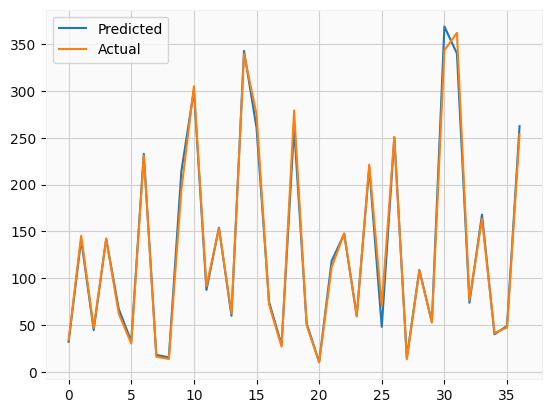

In [53]:
# lets visualize the graph of predicted values with respect to actual values
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

**K-Nearest Neighbors (KNN):**

In [54]:
# importing KNN library
from sklearn.neighbors import KNeighborsRegressor
# importing gridsearch
from sklearn.model_selection import GridSearchCV

# creating object of KNN
knn = KNeighborsRegressor()
# randomely taking paramets of n_neighbours
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
# creating model for gridsearch for getting best parameters with respect to KNN model
model = GridSearchCV(knn,params,cv=5)

In [55]:
# fitting gridsearch model on the tranformed data
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [56]:
# lets see best paramets by the gridsearch
model.best_params_

{'n_neighbors': 2}

In [57]:
# performing KNN regression by using that parameter
knn = KNeighborsRegressor(n_neighbors=2)

In [58]:
# fitting the model by using transofrmed data
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [59]:
# predicting by using KNN model
knn_pred = knn.predict(x_test)

In [60]:
# caculating R square value of the model
r2_knn = r2_score(y_test,knn_pred)
r2_knn

0.9931154527450295

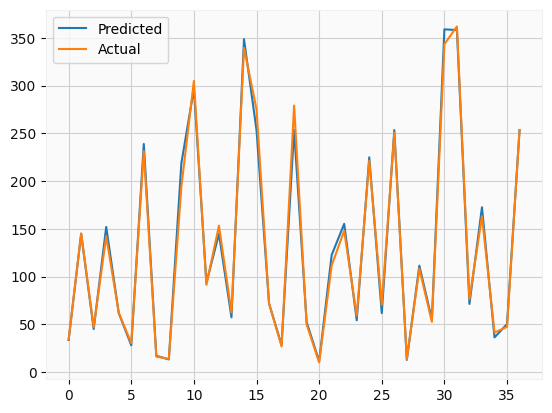

In [61]:
# lets see the visualization of the Knn prediction with the acutal data points
plt.plot(knn_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

**RandomForest**

In [62]:
# performing random forest by using Grid search
rf = RandomForestRegressor()
params = {'n_estimators':[100,200,300],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'max_features':['sqrt', 'log2', None]}
rf_model = GridSearchCV(rf,params,cv=5)

In [63]:
# fitting the model on the train data
rf_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

In [64]:
# lets see the best parameters
rf_model.best_params_

{'criterion': 'friedman_mse', 'max_features': None, 'n_estimators': 100}

In [65]:
# fitting the model by using parameters what gridsearch showed
rf = RandomForestRegressor(criterion= 'friedman_mse', max_features= None, n_estimators= 300)

In [66]:
# fiting the random forest model on the train data
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_features=None,
                      n_estimators=300)

In [67]:
#lets predict by using test data
rf_predict_ = rf.predict(x_test)

In [68]:
# caculate R square value for the random forest model
rf_r2 = r2_score(y_test,rf_predict_)
rf_r2

0.9854023289336051

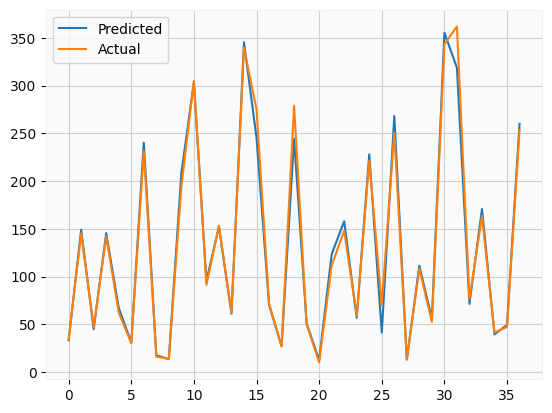

In [69]:
# lets visualize the actual and predicted datapoints
plt.plot(rf_predict_)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

**Ridge Regression**

In [70]:
# lest perform ridge regression by using the dame approach of grid search
ridge =Ridge()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)
ridge_regressor.best_params_

{'alpha': 100}

In [71]:
# now we have the alpha (significance )value which we got by the help of grid search
ridge =Ridge(alpha= 100)

In [72]:
# performing the model fitting on the train data
ridge.fit(x_train,y_train)

Ridge(alpha=100)

In [73]:
# predicting by themodel of ridge regression
y_pred_ridge = ridge.predict(x_test)

In [74]:
# caculating R square value for the ridge model
ridge_r2 = r2_score(y_test,y_pred_ridge)
ridge_r2

0.9930447012730752

In [75]:
# Rsquare value
ridge_r2

0.9930447012730752

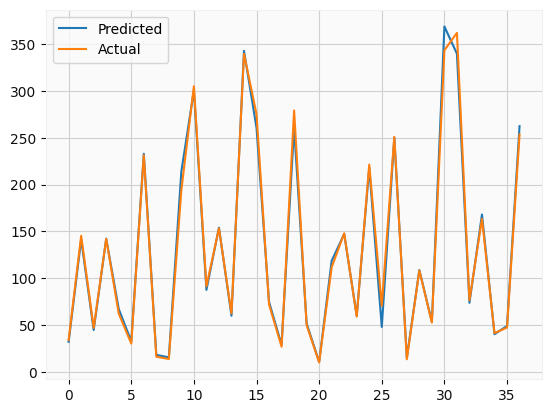

In [76]:
# lets visualize the graph of actual and and predicted datapoints
plt.plot(y_pred_ridge)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

**Lasso**

In [77]:
# performing lasso regression by using the same approach
lasso =Lasso()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [78]:
# lets see the best parameters
lasso_regressor.best_params_

{'alpha': 2.5}

In [79]:
# using best hyperparameter assigning the model
lasso =Lasso(alpha= 2.5)

In [80]:
# fitting the model on train data

lasso.fit(x_train,y_train)

Lasso(alpha=2.5)

In [81]:
# prediting by the model
lasso_predict = lasso.predict(x_test)

In [82]:
# caculating the R square of the model
lasso_r2 = r2_score(lasso_predict,y_test)
lasso_r2

0.9926378614771297

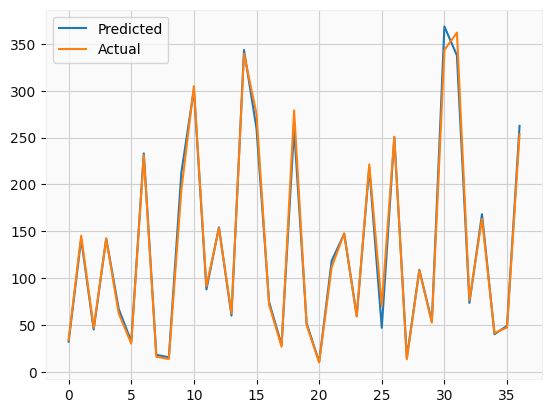

In [83]:
# visualize the graph of predicted and actual
plt.plot(lasso_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

**Elasticnet**

In [84]:
# performing Elasticnet by using the same appraoch
elastic =ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, param, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [85]:
# the best parameter of elasticnet regression model
elastic_regressor.best_params_

{'alpha': 5, 'l1_ratio': 0.1}

In [86]:
# using these hyperparameter for customise the model
elastic =ElasticNet(alpha = 5, l1_ratio = 0.1)

In [87]:
# fitting them model on the train data
elastic.fit(x_train,y_train)

ElasticNet(alpha=5, l1_ratio=0.1)

In [88]:
# predicting by using the elastic net model
elastic_predict = elastic.predict(x_test)

In [89]:
# caculating the R square value for the model
elastic_r2 = r2_score(elastic_predict,y_test)
elastic_r2

0.9927052671881713

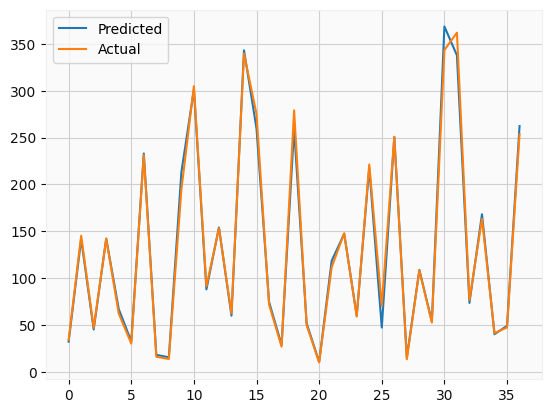

In [90]:
# lets visualise the actual and the predicted datapoints
plt.plot(elastic_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

**Evaluation and Improvement of Model**

In [91]:
#Compare Model Performance by using all the models
Report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression','knn regression','RandomForest Regression'],'r2_score':[linear_r2,ridge_r2,lasso_r2,elastic_r2,r2_knn,rf_r2]})


In [92]:
# lets see the performance sequance wise
Report.sort_values(by=['r2_score'],ascending=False,inplace=True)

In [93]:
Report

,model,r2_score
4,knn regression,0.993115
0,linear regression,0.993056
1,ridge regression,0.993045
3,elastic net regression,0.992705
2,lasso regression,0.992638
5,RandomForest Regression,0.985402


####**Feature Importance:**

For Random Forest and other applicable models, determine feature importance.

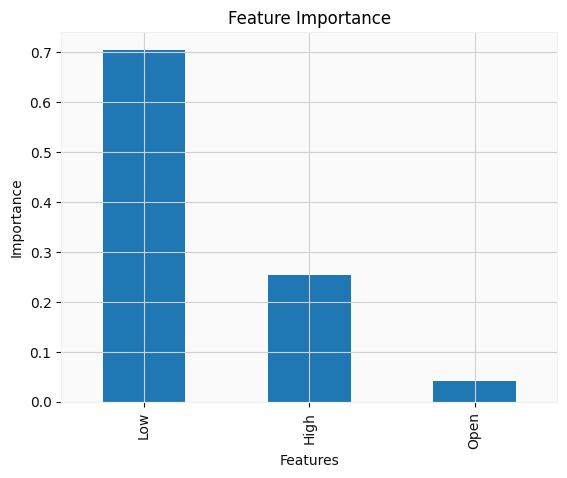

In [94]:
# Assuming you have already run GridSearchCV and fitted the model
rf_best = rf_model.best_estimator_

# Extract feature importances
feature_importance = pd.Series(rf_best.feature_importances_, index=independent_variable).sort_values(ascending=False)

# Plot feature importances
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**Conclusions Drawn :**

- The dataset contains monthly stock prices of Yes Bank since its inception.
- There is a significant impact on stock prices due to the fraud case involving Rana Kapoor in 2018.
- No null values or duplicate data were found.
- Despite outliers, they were retained to avoid data loss.
- Applied power transformation to handle positively skewed distribution.
- High correlation between dependent and independent variables indicates a good prediction potential.
- High multicollinearity among independent variables due to small dataset.
- KNN Regressor performed the best with an R2 score of 0.993115.

**Project Utility for Stakeholders:**

- Accurate prediction of closing prices can assist investors in making informed decisions.
- Helps in understanding the impact of major events on stock prices.
- Provides a basis for further financial analysis and investment strategies.

Thank you !